In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

In [3]:
# Load your local CSV file (replace 'AAPL.csv' with your actual path)
data = pd.read_csv('AAPL_1980_To_2024.csv')
data = data[['Date', 'Close']]  # Ensure 'Close' column exists
data = data.dropna()

In [4]:
# Convert to datetime and sort
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

<ipython-input-4-0dcf846d644c>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['Date'] = pd.to_datetime(data['Date'])


In [5]:
# Prepare the closing price
close_prices = data['Close'].values.reshape(-1, 1)

In [6]:
# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)


In [7]:
# Creating training data
X_train, y_train = [], []
window_size = 60
for i in range(window_size, len(scaled_data)):
    X_train.append(scaled_data[i-window_size:i, 0])
    y_train.append(scaled_data[i, 0])

In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [9]:
# Building the model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - loss: 0.0036
Epoch 2/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - loss: 1.1065e-04
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - loss: 8.7934e-05
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 7.5561e-05
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - loss: 6.2105e-05
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - loss: 6.3351e-05
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - loss: 4.9465e-05
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - loss: 5.2654e-05
Epoch 9/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - loss: 7.3209e-05
Epoch 10/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - loss: 4.0929e-05


In [12]:
# Prediction
test_input = scaled_data[-(window_size + 100):]
X_test = []
for i in range(window_size, len(test_input)):
    X_test.append(test_input[i-window_size:i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


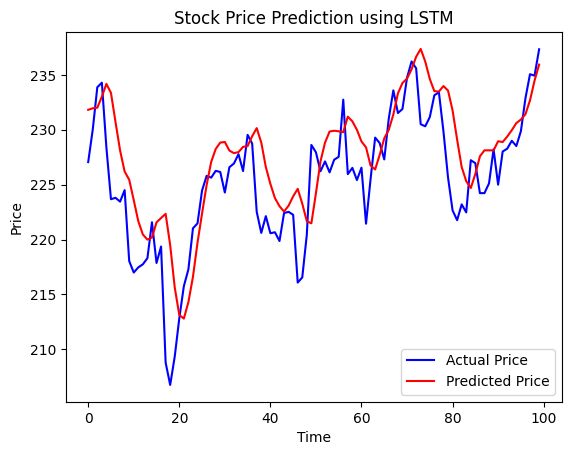

In [13]:
# Plotting
plt.plot(close_prices[-len(predicted):], color='blue', label='Actual Price')
plt.plot(predicted, color='red', label='Predicted Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()